# Classification 

This notebook deals with whether a customer will default on the loan payment or not. The file consists of the following columns *ClientId*,*Income*,*Age*,*Loan* and *Default*.

*ClientId* can be dropped as it is not a deciding factor in whether a client will default on the loan payment or not. *Income*,*Age* and *Loan* are important features in decinding whether a client will default.

Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

*confusion_matrix* is used to show towards which class the model is biased towards. *accuracy_score* calculates the accuracy, but it does not show how good the model behaves.

*train_test_split* is used to split the features and output into train and test datasets. This is recommened as the model shoould not be tested on the complete dataset. If it is the model may overfit.

*KNeighboursClassifier* is the scikit-learn implement of the k-NN classification algorithm.

Reading the file using `read_csv` module of `pandas`.

In [2]:
data = pd.read_csv("../input/credit-risk/original.csv")
data.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


0 is not default while 1 is default

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


"Age" has three rows with NaN as values, we are filling them with the mean of the column.

In [4]:
data.fillna(data.mean(),inplace=True)

Dropping the *clientid* as it does not define whether the client defaults or not.

In [5]:
data.drop(columns="clientid",inplace=True)
data["age"] = data["age"].astype("int")
data.head()

,income,age,loan,default
0,66155.925095,59,8106.532131,0
1,34415.153966,48,6564.745018,0
2,57317.170063,63,8020.953296,0
3,42709.534201,45,6103.642260,0
4,66952.688845,18,8770.099235,1


Splitting the dataset into features and output. 

> X -> *income*, *age* and *loan*

> y -> *default*

In [6]:
X = data[["income","age","loan"]]
y = data["default"]

Splitting the features and output into train and test dataset with test as 20% of features and default.

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

Initializing the k-NN algorithm with minimum number of neighbours to classify in a class at 4

In [8]:
neigh = KNeighborsClassifier(n_neighbors=4)

model = neigh.fit(X_train,y_train)

y_pred = model.predict(X_test)

Printing the *Mean Squared Error* and *Accuracy Score* of the classifier.

In [9]:
print("Mean Squared Error{:.3f}".format(mean_squared_error(y_pred,y_test)))
print("Accuracy score:{:.3f}".format(accuracy_score(y_pred,y_test)*100))

Mean Squared Error0.158
Accuracy score:84.250


An accuracy of *84.750* is achieved with a mean squared error of *0.152*.

Comparing the predicted values and actual values and storing in in a CSV file.

In [10]:
results = pd.DataFrame({"Actual Values":y_test,
                        "Predicted Values":y_pred})
results.head()

,Actual Values,Predicted Values
456,0,1
1584,1,0
175,0,0
482,1,0
1477,0,0


In [11]:
results.to_csv("k-NN.csv",index=False)

Plotting the confusion matrix to determine towards which model is the class biased towards.

<Figure size 432x288 with 0 Axes>

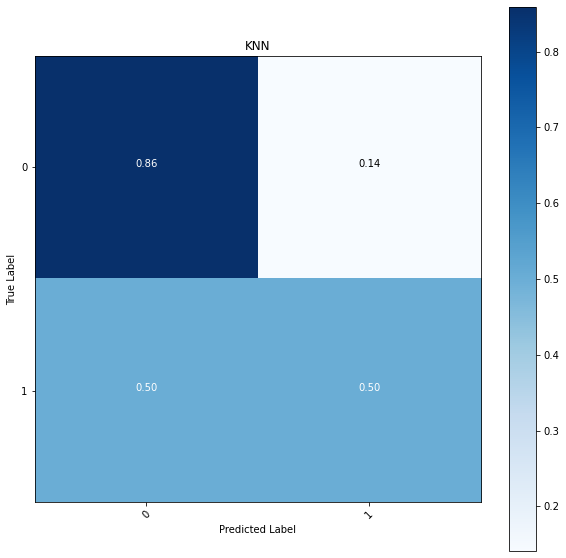

In [12]:
cm = confusion_matrix(y_pred,y_test)

def plot_confusion_matrix(cm,classes,title='Confusion Matrix',cmap=plt.cm.Blues):
    
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

classes=['0','1']

plt.figure()
plot_confusion_matrix(cm,classes,title="KNN")
plt.show()

As it can be seen that the model is biased towards the customer not defaulting. The accuracy should not be the only metric to be used for comparing models.

# Normalising the Data

In the previous model the feature data was not normalised. Normalisation allows the data to be on the same plane or within similar ranges.

Take this for example, features with values (10000,1,100) and (20000,0,200). Using euclidean or  minkowski distance the second values change is overshadowed by the other first and third values change. By normalising all the changes in each value ar given similar measure. This allows the model to train more precisely and efficiently.

Using StandardScaler from scikit-learn. 

The mean and standard variance is calculated. The mean is subtracted from each value and subsequently divided by the variance.

The MinMaxScaler can also be used where the minimum is subtracted from each value and divided by the difference between maximum and minimum values.

This done with every column in the features data before the splitting into train and test datasets.

In [13]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.columns = ["income","age","loan"]
X.head()

,income,age,loan
0,1.453934,1.373508,1.202819
1,-0.762176,0.565152,0.696427
2,0.836821,1.667456,1.174711
3,-0.183070,0.344691,0.544980
4,1.509563,-1.639458,1.420765


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

Using the normalised data and making a model.

In [15]:
neigh = KNeighborsClassifier(n_neighbors=3)

model = neigh.fit(X_train,y_train)

y_pred = model.predict(X_test)

Calculating the accuracy and mean squared error.

In [16]:
print("Mean Squared Error: {:.3f}".format(mean_squared_error(y_pred,y_test)))
print("Accuracy score: {:.3f}".format(accuracy_score(y_pred,y_test)*100))

Mean Squared Error: 0.010
Accuracy score: 99.000


An accuracy of *97.500* is obtained with a mean squared error of *0.025*.

In [17]:
results_normalized = pd.DataFrame({"Actual Values":y_test,
                        "Predicted Values":y_pred})
results_normalized.head()

,Actual Values,Predicted Values
1500,0,0
1138,0,0
1428,0,0
1344,0,0
1896,0,0


In [18]:
results_normalized.to_csv("k-NN_normalized.csv",index=False)

Plotting the confusion matrix to comapre with the previous model.

<Figure size 432x288 with 0 Axes>

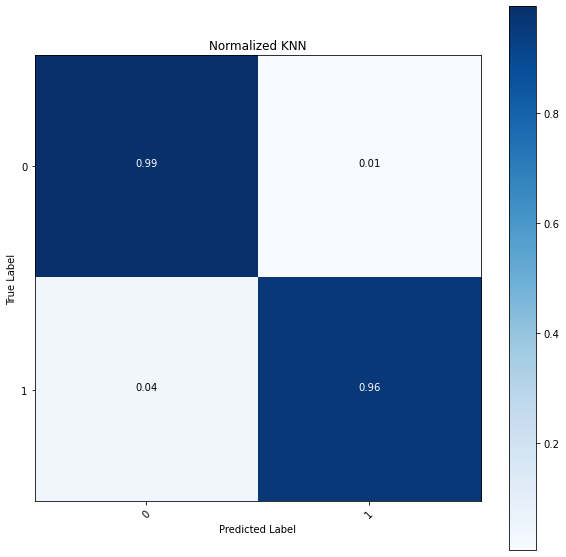

In [19]:
cm = confusion_matrix(y_pred,y_test)

def plot_confusion_matrix(cm,classes,title='Confusion Matrix',cmap=plt.cm.Blues):
    
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

classes=['0','1']

plt.figure()
plot_confusion_matrix(cm,classes,title="Normalized KNN");
plt.show();

As it can be seen that this model is definitely better than the previous model.